<a href="https://colab.research.google.com/github/wazeda/Home-Cleaning-Services-Analysis/blob/main/wazed_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1


In [32]:
# ### step 1: Import laibraies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



### Step 2


In [9]:
#### Step 2
df = pd.read_csv('/content/Home Cleaning Services.csv.csv')

output=[]
output.append('Exploratory Data Analysis os Home Cleaning Services\n')
output.append('==========\n')

print(df)

           Date      Product Region   Customer_Type  Quantity   Price  \
0    2024-06-17       Prints   West  Art Collectors        93  486.45   
1    2024-06-14  Merchandise   East  General Public        23   43.84   
2    2024-06-22       Prints   West  General Public        18  223.59   
3    2024-02-07  Commissions   East  Art Collectors        23  447.69   
4    2024-11-17       Prints  North  Art Collectors        31  403.19   
..          ...          ...    ...             ...       ...     ...   
995  2024-04-29       Prints  South  Art Collectors        27  370.66   
996  2024-04-22       Prints   East  Art Collectors        51  312.68   
997  2024-03-28  Commissions  North  Art Collectors        73  186.29   
998  2024-04-21  Commissions   West  Art Collectors        30  189.47   
999  2024-01-12  Merchandise  North  Art Collectors        39  212.97   

     Discount   Revenue  
0        0.12  39811.07  
1        0.16    846.99  
2        0.12   3541.67  
3        0.14   885

Step 3


In [10]:
print(df.head())
output.append(f'First few rows:\n{df.head()}\n')

###Get basic information
df.info()

         Date      Product Region   Customer_Type  Quantity   Price  Discount  \
0  2024-06-17       Prints   West  Art Collectors        93  486.45      0.12   
1  2024-06-14  Merchandise   East  General Public        23   43.84      0.16   
2  2024-06-22       Prints   West  General Public        18  223.59      0.12   
3  2024-02-07  Commissions   East  Art Collectors        23  447.69      0.14   
4  2024-11-17       Prints  North  Art Collectors        31  403.19      0.05   

    Revenue  
0  39811.07  
1    846.99  
2   3541.67  
3   8855.31  
4  11873.95  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1000 non-null   object 
 1   Product        1000 non-null   object 
 2   Region         1000 non-null   object 
 3   Customer_Type  1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Price      

In [11]:
print(df.describe())
output.append(f'Summary Statistics:\n{df.describe()}\n')

          Quantity        Price     Discount       Revenue
count  1000.000000  1000.000000  1000.000000   1000.000000
mean     50.050000   246.651940     0.147120  10479.090760
std      28.621682   142.376184     0.086409   9380.115188
min       1.000000     5.610000     0.000000     12.520000
25%      26.000000   122.595000     0.070000   3066.475000
50%      49.000000   235.800000     0.140000   7832.765000
75%      74.000000   367.970000     0.220000  15146.797500
max     100.000000   499.430000     0.300000  44847.000000


Step 4


In [16]:
output.append('Data Cleaning Results:\n')
##Check for missing value
missing_values = df.isnull().sum()
print(missing_values)
output.append(f'Missing Values:\n{missing_values}')

##fill or drop
df.dropna(inplace=True)

### cnvert the Date  column to datetime fromat
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [20]:
###Check for duplicates

duplicates = df.duplicated().sum()
output.append(f'Number of Duplicates Dropped: {duplicates}\n')
df.drop_duplicates(inplace=True)
print(df)

          Date      Product Region   Customer_Type  Quantity   Price  \
0   2024-06-17       Prints   West  Art Collectors        93  486.45   
1   2024-06-14  Merchandise   East  General Public        23   43.84   
2   2024-06-22       Prints   West  General Public        18  223.59   
3   2024-02-07  Commissions   East  Art Collectors        23  447.69   
4   2024-11-17       Prints  North  Art Collectors        31  403.19   
..         ...          ...    ...             ...       ...     ...   
995 2024-04-29       Prints  South  Art Collectors        27  370.66   
996 2024-04-22       Prints   East  Art Collectors        51  312.68   
997 2024-03-28  Commissions  North  Art Collectors        73  186.29   
998 2024-04-21  Commissions   West  Art Collectors        30  189.47   
999 2024-01-12  Merchandise  North  Art Collectors        39  212.97   

     Discount   Revenue  
0        0.12  39811.07  
1        0.16    846.99  
2        0.12   3541.67  
3        0.14   8855.31  
4    

Step 5

In [23]:
### Total revenue from cleaning services
Total_revenue = df['Revenue'].sum()
output.append(f'Total Revenue: ${Total_revenue}\n')
print(f'Total Revenue: ${Total_revenue}')


Total Revenue: $10479090.76


In [26]:
###average price per Customer type  wise

average_price_per_service = df.groupby('Customer_Type')['Revenue'].mean()
output.append('Average price per cutomaer:\n')
output.append(f'{average_price_per_service}\n')
print(average_price_per_service)

Customer_Type
Art Collectors    10116.920102
General Public    10824.284668
Name: Revenue, dtype: float64


In [27]:
###Total services provided by region
total_servces_by_region = df['Region'].value_counts()
output.append('total servces provided by region:\n')
output.append(f'{total_servces_by_region}\n')
print(total_servces_by_region)

Region
East     287
North    268
West     233
South    212
Name: count, dtype: int64


In [47]:
####Total revenue by region
revenue_by_region = df.groupby('Region')['Revenue'].sum()
output.append('total Revenue by region:\n')
output.append(f'{revenue_by_region}\n')
revenue_by_region

,Revenue
Region,
East,3059713.53
North,2635683.59
South,2215255.16
West,2568438.48


Step 6


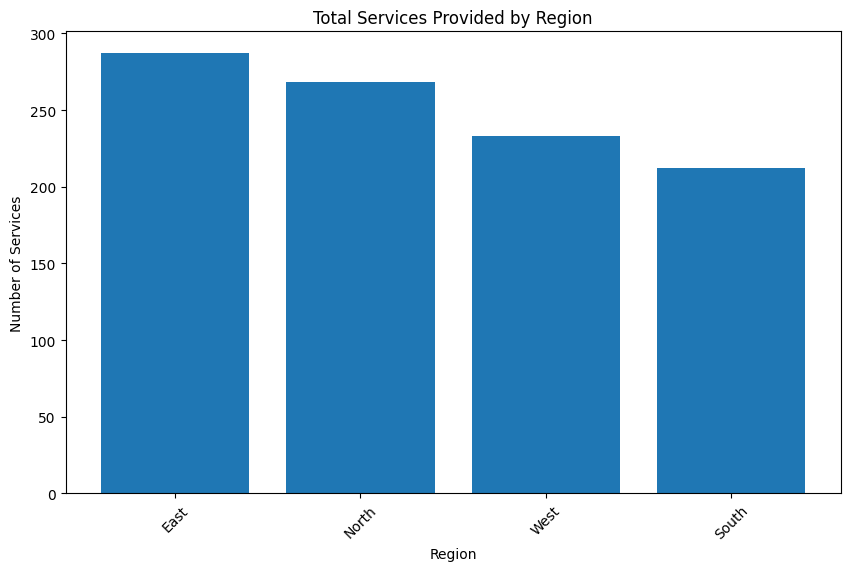

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(total_servces_by_region.index, total_servces_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_sercices_by_region.png')
plt.show()

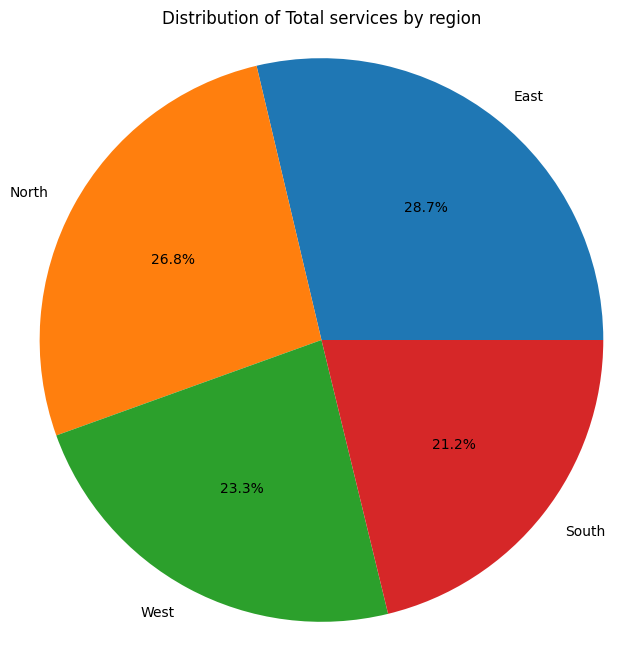

In [44]:
#### pie chart for total service by region
plt.figure(figsize=(8, 8))
plt.pie(total_servces_by_region, labels = total_servces_by_region.index, autopct='%1.1f%%')
plt.title('Distribution of Total services by region')
plt.axis('equal')
plt.savefig('services_distribution_by_region.png')
plt.show()

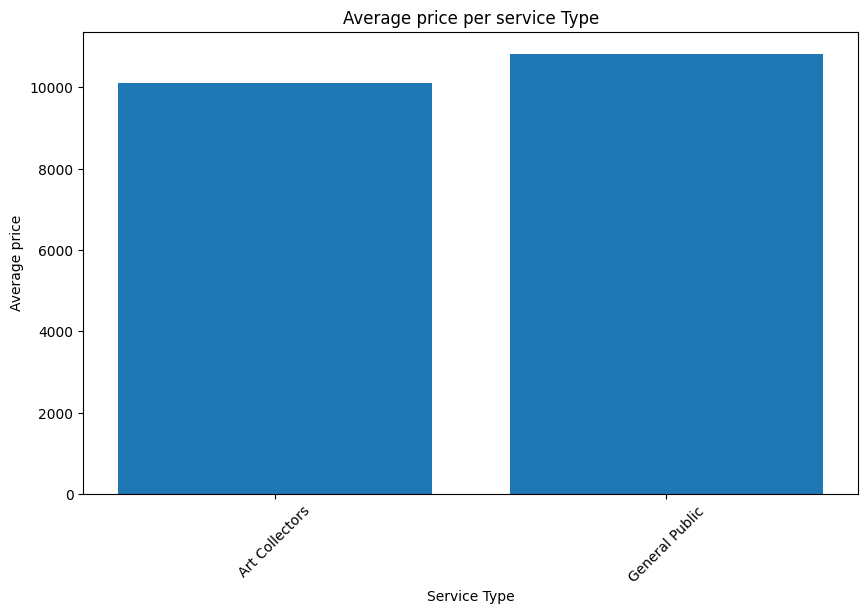

In [45]:
### ber plot of average

plt.figure(figsize=(10, 6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average price per service Type')
plt.xlabel('Service Type')
plt.ylabel('Average price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')
plt.show()

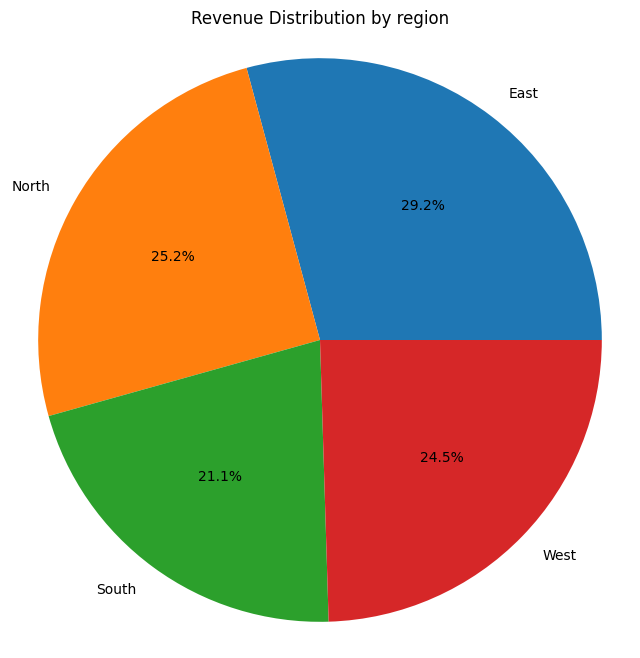

In [48]:
#### pie chart for total service by region
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_region, labels = revenue_by_region.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by region')
plt.axis('equal')
plt.savefig('revenue_distribution_by_region.png')
plt.show()

In [53]:
#### Save output to a text file

with open('analysis_output.txt', 'w') as f:
  f.write(line + '\n')